# Assignment 3

By: Rosayla Coulthard

Due: 14 May 2024

### Part 1
For each point in the complex plane $c = x + iy$, with $-2 < x < 2$ and $-2 < y < 2$, set $z_0 = 0$ and iterate the equation $z_{i + 1} = z_i^2 + c$. 
Note what happens to the $z_i$'s: some points will remain bounded in absolute value $|z|^2 = \Re(z)^2 + \Im(z)^2$, while others will run off to infinity. 
Make an image  in which your points $c$ that diverge are given one color and those that stay bounded are given another.
Make a second image where the points are coloured by a colourscale that indicates the iteration number at which the given point diverged.

For this question, put the code that does the iteration in a function and place this function in a separate .py file which you import in your .ipynb.
Perform the plots in the notebook.

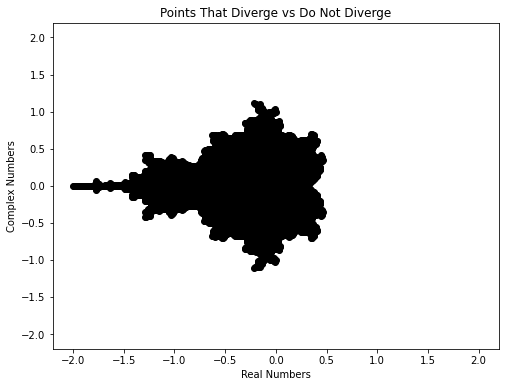

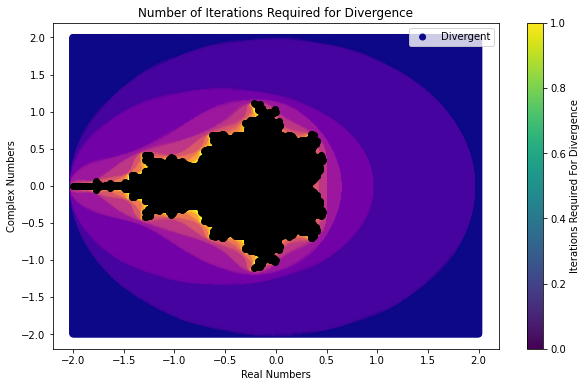

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy
from scipy.integrate import solve_ivp

from assignment_q1_iteration_import import iterate

conv, div, loops = iterate(-2.00, 2.01, 0.01)

plt.figure(figsize=(8,6))
plt.scatter(np.real(div), np.imag(div), color='white', label="Divergent")
plt.scatter(np.real(conv), np.imag(conv), color='black', label="Convergent")
plt.xlabel("Real Numbers")
plt.ylabel("Complex Numbers")
plt.title("Points That Diverge vs Do Not Diverge")
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(np.real(div), np.imag(div), c=loops, cmap='plasma', label="Divergent")
plt.scatter(np.real(conv),np.imag(conv), color = "black")
cbar = plt.colorbar()
cbar.set_label("Iterations Required For Divergence")
plt.legend()
plt.xlabel("Real Numbers")
plt.ylabel("Complex Numbers")
plt.title("Number of Iterations Required for Divergence")
plt.show()

### Part 2
One of the earliest demonstrations that deterministic physical systems could exhibit unpredictable behavior was given by Edward Lornez, a meteorologist. The original paper is \url{https://journals.ametsoc.org/view/journals/atsc/20/2/1520-0469_1963_020_0130_dnf_2_0_co_2.xml}, which is worth downloading and looking over.

Lorenz was interested in modeling the behavior of Earth's atmosphere, i.e., a thin atmosphere (thin relative to the radius of Earth) heated from below (the air is heated by infrared radiation from the ground, or by condensing water vapor in thunder clouds, rather than by sunlight). Lorenz applies a Fourier transform to the basic equations, and truncates the number of Fourier modes, keeping only three, with amplitudes denoted by $W\equiv(X, Y, Z)$.

The equations (Lorenz' equations 25, 26, and 27) are

\begin{eqnarray}
\dot X &=& -\sigma(X-Y)\\
\dot Y &=& rX -Y - XZ\\
\dot Z &=& -bZ + XY
\end{eqnarray}

The three dimensionless parameters are $\sigma$, the Prandtl number (the ratio of the kinematic viscosity to the thermal diffusivity), the Rayleigh number $r$ (which depends on the vertical temperature difference between the top and bottom of the atmosphere), and b, which is a dimensionless length scale.

Note that there are non-linear terms in the second and third equations;
these terms result in very complex dynamics.

Your task is to:
- code up the equations, using a function definition, with a proper docstrings (inside triple quotes)
- use an ode solver of your choice, i.e., solve\_ivp, or ode, to integrate the equations for t=60 (in dimensionless time units). Use Lorenz' initial conditions $W_0=[0., 1., 0.]$ and his parameter values [$\sigma, r, b$] = [10., 28, 8./3.].
- Reproduce Lorenz' Figure 1. Label both axes! Note that Lorenz uses $N=t/\Delta t$ to label his plots (here $\Delta t=0.01$).
- Reproduce Lorenz' Figure 2. You will likely have to ask for output at very closely spaced time intervals, e.g., if you use solve\_ivp, you will need something like t = np.linspace(14, 19, 1000) followed by W = sol.sol(t). Again, label both axes.

Now find the solution using the same values of $(\sigma, r, b)$, but this time with initial conditions very slightly different than $W_0$, say $W'_0 = W_0+[0., 1.e-8, 0] = [0., 1.00000001, 0.]$; note that adding the two lists (as indicated here) will not work, so you should google to find out how to add two lists element by element. Calculate the distance between $W'$ and $W$ as a function of time, and plot the result on a semilog plot (linear time, log distance). A straight line on such a plot, which is what Lorenz found, indicates exponential growth. Thus a small error in the initial condition will grow rapidly, meaning that predictions of future behavior will not be accurate.
\end{enumerate}

For this question you may put all of your code in the jupyter notebook or place some of it in a separate .py file as you see fit. The only requirement is that you make sure it runs correctly in the correct order (ie restart your kernel and run each cell in order to check it works correctly before submitting).

In [4]:
# Part 1: Creating the function
def W_func(t, W, sig, r, b):
    """Creates and array of the derivatives (with respect to time) of the 25th, 26th, and 27th of Lorenz' equations.
    
    Parameters:
    t ------------- The input time, W depends on t
    W ------------- The three initial amplitudes of the remaining Fourier modes upon truncation.
    sig ----------- The given Prandtl number
    r ------------- The given Rayleigh number
    b ------------- The given dimensionless length scalenumber
    
    Returns:
    W --------- array-like collection of the derivatives of Lorenz' equations with respect to time.
    """
    X, Y, Z = W
    return np.array([-sig * (X - Y),
                     r * X - Y - X*Z,
                     -b * Z + X * Y])

In [5]:
# Part 2: Solving the ODE
W_0=[0.0, 1.0, 0.0]
sig = 10.0
r = 28.0
b = 8.0 / 3.0
params = (sig, r, b)
t_span = [0,60]
sol = solve_ivp(W_func, t_span, W_0, args=params)

# This is the solution for X, Y, and Z from solving the ODE
W = sol.y

#Since we go from 0 to 60 we want the last value produced for W which is:
x_sol = W[0][-1]
y_sol = W[1][-1]
z_sol = W[2][-1]
print("Value of equations at t = 60: ", [x_sol, y_sol, z_sol])

Value of equations at t = 60:  [-3.2055939261171154, -2.0098502467673662, 23.207686346568696]


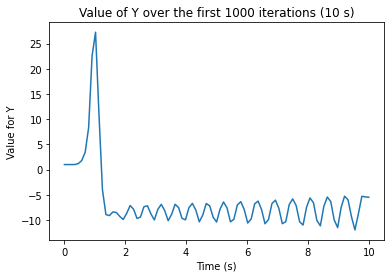

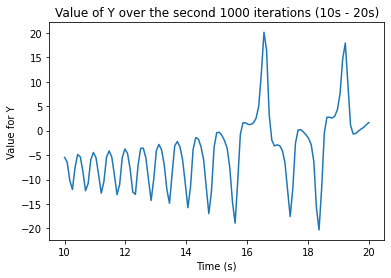

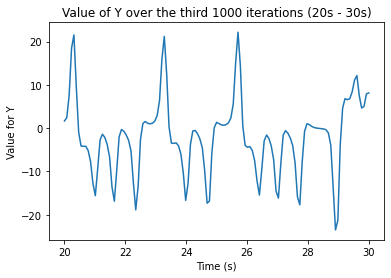

In [6]:
# Part 3: Reproducing Figure 1
# To find the length of time required for 1000 iterations, we use N =t/delta t
t = 0.01 * 1000
to_plot_1 = solve_ivp(W_func, [0,t], W_0, args=params)
time_1 = np.linspace(0,10, len(to_plot_1.y[1]))
plt.plot(time_1, to_plot_1.y[1])
plt.xlabel("Time (s)")
plt.ylabel("Value for Y")
plt.title("Value of Y over the first 1000 iterations (10 s)")
plt.show()

new_W_0 = [to_plot_1.y[0][-1],to_plot_1.y[1][-1],to_plot_1.y[2][-1]]
to_plot_2 = solve_ivp(W_func, [t,2*t], new_W_0, args=params)
time_2 = np.linspace(10,20, len(to_plot_2.y[1]))
plt.plot(time_2, to_plot_2.y[1])
plt.xlabel("Time (s)")
plt.ylabel("Value for Y")
plt.title("Value of Y over the second 1000 iterations (10s - 20s)")
plt.show()

newer_W_0 = [to_plot_2.y[0][-1],to_plot_2.y[1][-1],to_plot_2.y[2][-1]]
to_plot_3 = solve_ivp(W_func, [2*t,3*t], newer_W_0, args=params)
time_3 = np.linspace(20,30, len(to_plot_3.y[1]))
plt.plot(time_3, to_plot_3.y[1])
plt.xlabel("Time (s)")
plt.ylabel("Value for Y")
plt.title("Value of Y over the third 1000 iterations (20s - 30s)")
plt.show()

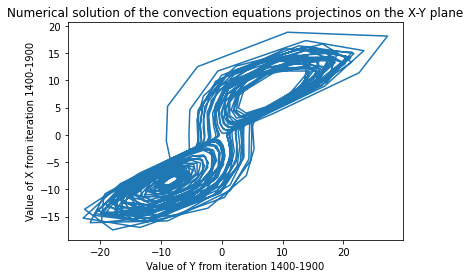

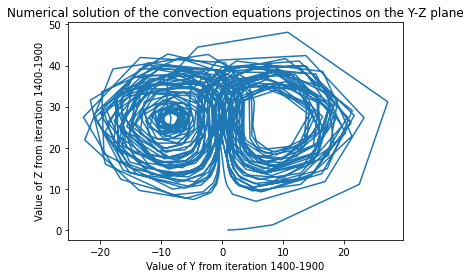

In [7]:
# Part 4: Reproducing Figure 2
# We can find the times we must solve the differential equation for by using N =t/delta t
           
t_start = 0.01 * 1400
t_end = 0.01 * 1900
to_plot_4 = solve_ivp(W_func, [t_start, t_end], W_0, args=params)

plt.plot(sol.y[1], sol.y[0])
plt.xlabel("Value of Y from iteration 1400-1900")
plt.ylabel("Value of X from iteration 1400-1900")
plt.title("Numerical solution of the convection equations projectinos on the X-Y plane")
plt.show()

plt.plot(sol.y[1], sol.y[2])
plt.xlabel("Value of Y from iteration 1400-1900")
plt.ylabel("Value of Z from iteration 1400-1900")
plt.title("Numerical solution of the convection equations projectinos on the Y-Z plane")
plt.show()

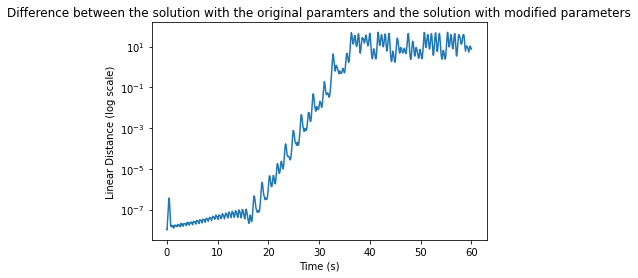

In [8]:
# Part 5: Comparing different intial conditions
W_0_5=[0.0, 1.00000001, 0.0]
sig = 10.0
r = 28.0
b = 8.0 / 3.0
params = (sig, r, b)
t_span = [0,60]
# Note: we must set t_eval to be sol.t which is the intial set of time used for the original ODE solution
sol_5 = solve_ivp(W_func, t_span, W_0_5, args=params, t_eval = sol.t)

distance = np.linalg.norm(sol_5.y - sol.y, axis = 0)
plt.semilogy(sol.t, distance)
plt.xlabel("Time (s)")
plt.ylabel("Linear Distance (log scale)")
plt.title("Difference between the solution with the original paramters and the solution with modified parameters")
plt.show()

### Part 3

Writeup your results in a latex file which includes at least one plot for each of the questions as well as a description of the methods and the result. Submit the .tex file and a pdf generated from it. Your writeup should be 1-3 pages long, excluding figures. Save your figures as a .pdf file.

File located inside the assignment_3 folder.